# Predicting Car Prices

In this project I will use the k-nearest neighbors algorithm to predict a car's market price by using its attributes. The dataset we will be working with contains information about various cars, wuch as the motor's displacement, weight of the car, miles per gallon, how fast the car accelerates, etc. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

In [22]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

cars = pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


I will have to manually name the columns, using the column names from the dataset description

In [23]:
cols = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 
        'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [24]:
# Select only the columns with numeric values
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars_numeric = cars[numeric_cols]
cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [25]:
# Replace missing values '?' with numpy.nan
cars_numeric = cars_numeric.replace('?', np.nan)

In [26]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_rate     205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [27]:
# '?' stored entries as objects when they should have been numeric types. Convert those columns to numeric
cars_numeric = cars_numeric.astype(float)

In [28]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_rate     205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [29]:
cars_numeric.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [30]:
# remove rows where price is null, because this is the value we're trying to predict
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_rate      0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [31]:
# replace all other null values with mean from that column
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_rate     0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [32]:
# all null values replaced
# normalize all columns to range from 0 to 1, except for price column

cars_norm = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_norm['price'] = cars_numeric['price']
cars_norm.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


Let's start with some univariate k-nearest neighbor models before moving on to multivariate models.

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    # Randomize order of rows in df
    np.random.seed(1)
    df_rand = df.reindex(np.random.permutation(df.index))
    
    # Divide the number of rows in half
    middle = int(len(df_rand) / 2)
    
    # Select first hald as training set, second half as test set
    train = df_rand.iloc[0:middle]
    test = df_rand.iloc[middle:]
    
    # Instantiate KNeighborsRegressor class
    model = KNeighborsRegressor()
    model.fit(train[[train_col]], train[target_col])
    predictions = model.predict(test[[train_col]])
    mse = mean_squared_error(predictions, test[target_col])
    return mse**(1/2)


In [46]:
rmses = {}
cols = cars_norm.columns.drop('price')

for col in cols:
    rmse_val = knn_train_test(col, 'price', cars_norm)
    rmses[col] = rmse_val

rmses_series = pd.Series(rmses)
rmses_series.sort_values()


engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_rate     6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Engine size performed the best on this univariate model, height performed the worse.

I will now modify the knn_train_test function to use k values 1, 3, 5, 7, and 9

In [47]:
def knn_train_test(train_col, target_col, df, k = 5):
    # Randomize order of rows in df
    np.random.seed(1)
    df_rand = df.reindex(np.random.permutation(df.index))
    
    # Divide the number of rows in half
    middle = int(len(df_rand) / 2)
    
    # Select first hald as training set, second half as test set
    train = df_rand.iloc[0:middle]
    test = df_rand.iloc[middle:]
    
    k_vals = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_vals:
        # Instantiate KNeighborsRegressor class
        model = KNeighborsRegressor(n_neighbors = k)
        model.fit(train[[train_col]], train[target_col])
        predictions = model.predict(test[[train_col]])
        mse = mean_squared_error(predictions, test[target_col])
        k_rmses[k] = mse**(1/2)
    
    return k_rmses


In [56]:
k_rmse_results = {}

for col in cols:
    rmse_val = knn_train_test(col, 'price', cars_norm)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885

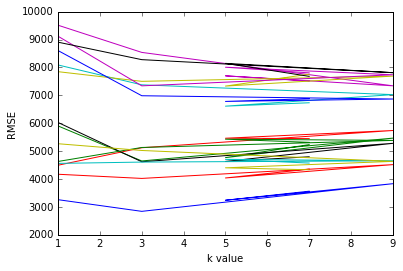

In [52]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

It appears that a k value of 3 will give the lowest root mean squared error

Now lets modify the knn_train_test function to work with multiple columns

In [66]:
avg_rmses = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmses[k] = avg_rmse
avg_rmses_series = pd.Series(avg_rmses)
avg_rmses_sorted = avg_rmses_series.sort_values()
top_cols = avg_rmses_sorted.index
print(avg_rmses_sorted)
print(top_cols)

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_rate     7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64
Index(['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg',
       'length', 'city_mpg', 'wheel_base', 'compression_rate', 'bore',
       'normalized_losses', 'stroke', 'peak_rpm', 'height'],
      dtype='object')


In [69]:
def knn_train_test(train_cols, target_col, df, k = 5):
    # Randomize order of rows in df
    np.random.seed(1)
    df_rand = df.reindex(np.random.permutation(df.index))
    
    # Divide the number of rows in half
    middle = int(len(df_rand) / 2)
    
    # Select first hald as training set, second half as test set
    train = df_rand.iloc[0:middle]
    test = df_rand.iloc[middle:]
    
    # Instantiate KNeighborsRegressor class
    model = KNeighborsRegressor()
    model.fit(train[train_cols], train[target_col])
    predictions = model.predict(test[train_cols])
    mse = mean_squared_error(predictions, test[target_col])
    return mse**(1/2)
    

In [76]:
# use the top 2 - 5 features to train and test a multivariate model using the default k value

top_cols_rmse = {}
for i in range(2,6):
    cols = top_cols[:i]
    top_cols_rmse[i] = knn_train_test(cols, 'price', cars_norm)
    
top_cols_rmse

{2: 2949.8817277180374,
 3: 3580.7376651928435,
 4: 3487.340917327035,
 5: 3410.2170133901805}

Using only the engine_size and horsepower columns returns the lowest root mean squared error

I will now vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values

In [79]:
def knn_train_test(train_cols, target_col, df, k = 5):
    # Randomize order of rows in df
    np.random.seed(1)
    df_rand = df.reindex(np.random.permutation(df.index))
    
    # Divide the number of rows in half
    middle = int(len(df_rand) / 2)
    
    # Select first hald as training set, second half as test set
    train = df_rand.iloc[0:middle]
    test = df_rand.iloc[middle:]

    k_vals = [k for k in range(1,26,2)]
    k_rmses = {}
    
    for k in k_vals:
        model = KNeighborsRegressor(n_neighbors = k)
        model.fit(train[train_cols], train[target_col])
        predictions = model.predict(test[train_cols])
        mse = mean_squared_error(predictions, test[target_col])
        k_rmses[k] = mse**(1/2)
    return k_rmses
    

In [82]:
k_rmses = {}

for top_feats in range(2,6):
    k_rmses['{} best features'.format(top_feats)] = knn_train_test(top_cols[:top_feats], 'price', cars_norm)

k_rmses

{'2 best features': {1: 2783.6204237227344,
  3: 2792.586573031673,
  5: 2949.8817277180374,
  7: 3164.681969020496,
  9: 3748.6716603306486,
  11: 4215.6372280600335,
  13: 4373.901683035496,
  15: 4539.505493095937,
  17: 4729.605305844226,
  19: 4824.3866193292615,
  21: 4837.429062000271,
  23: 4861.679492959275,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  3: 3333.6966577570593,
  5: 3580.7376651928435,
  7: 3639.9439408462786,
  9: 3986.593913133887,
  11: 4121.687230061635,
  13: 4328.476829895253,
  15: 4388.225713011904,
  17: 4404.781029718083,
  19: 4537.049753345422,
  21: 4636.731219491763,
  23: 4787.943506313775,
  25: 4816.708120139092},
 '4 best features': {1: 2952.725686581471,
  3: 3129.692821910155,
  5: 3487.340917327035,
  7: 3606.195077860286,
  9: 3875.274902378068,
  11: 4162.564050411074,
  13: 4368.061602779942,
  15: 4434.013914355171,
  17: 4512.996303789127,
  19: 4534.834065236792,
  21: 4688.356509517293,
  23: 4763.53531298931

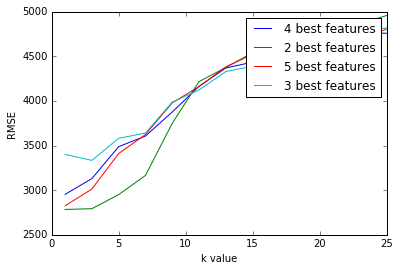

In [89]:
for k,v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x, y, label=k)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()


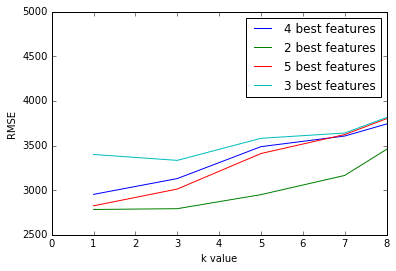

In [91]:
for k,v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x, y, label=k)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.xlim((0,8))
plt.show()

The 2, 4, and 5 best features has an optimal k value of 1
The 3 best features has an optimal k value of 3